In [11]:
import numpy as np #for array manipulation
import pandas as pd #for data handling
import sklearn
import scipy
import matplotlib.pyplot as plt #for graph plot
import seaborn as sns #for drawing highly attractive and informative statistical graphics

from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14,8
RANDOM_SEED = 42
LABELS=["Normal", "Fraud"]

In [12]:
data= pd.read_csv('creditcard.csv')

In [14]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [16]:
print(data.shape)

(284807, 31)


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [18]:
data.isnull().values.any()

False

In [19]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.23709

Text(0, 0.5, 'Frequency')

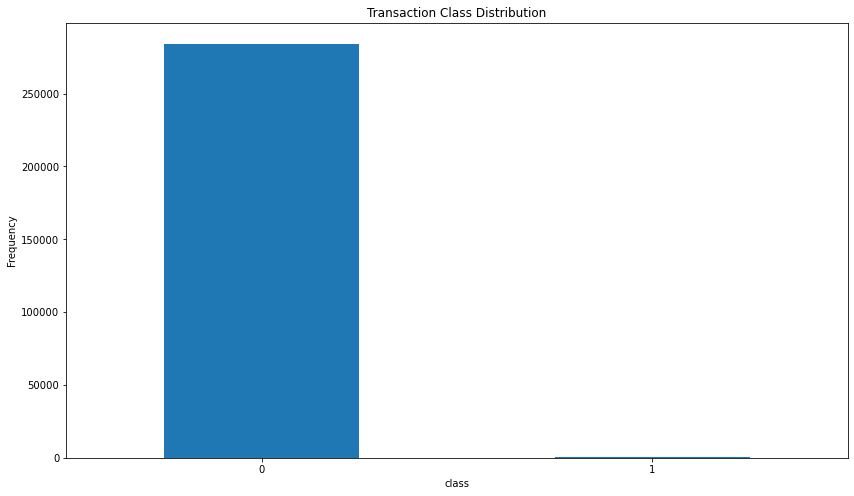

In [20]:
count_classes = pd.value_counts(data['Class'],sort = True)

count_classes.plot(kind='bar', rot=0)

plt.title("Transaction Class Distribution")
plt.xlabel("class")
plt.ylabel("Frequency")

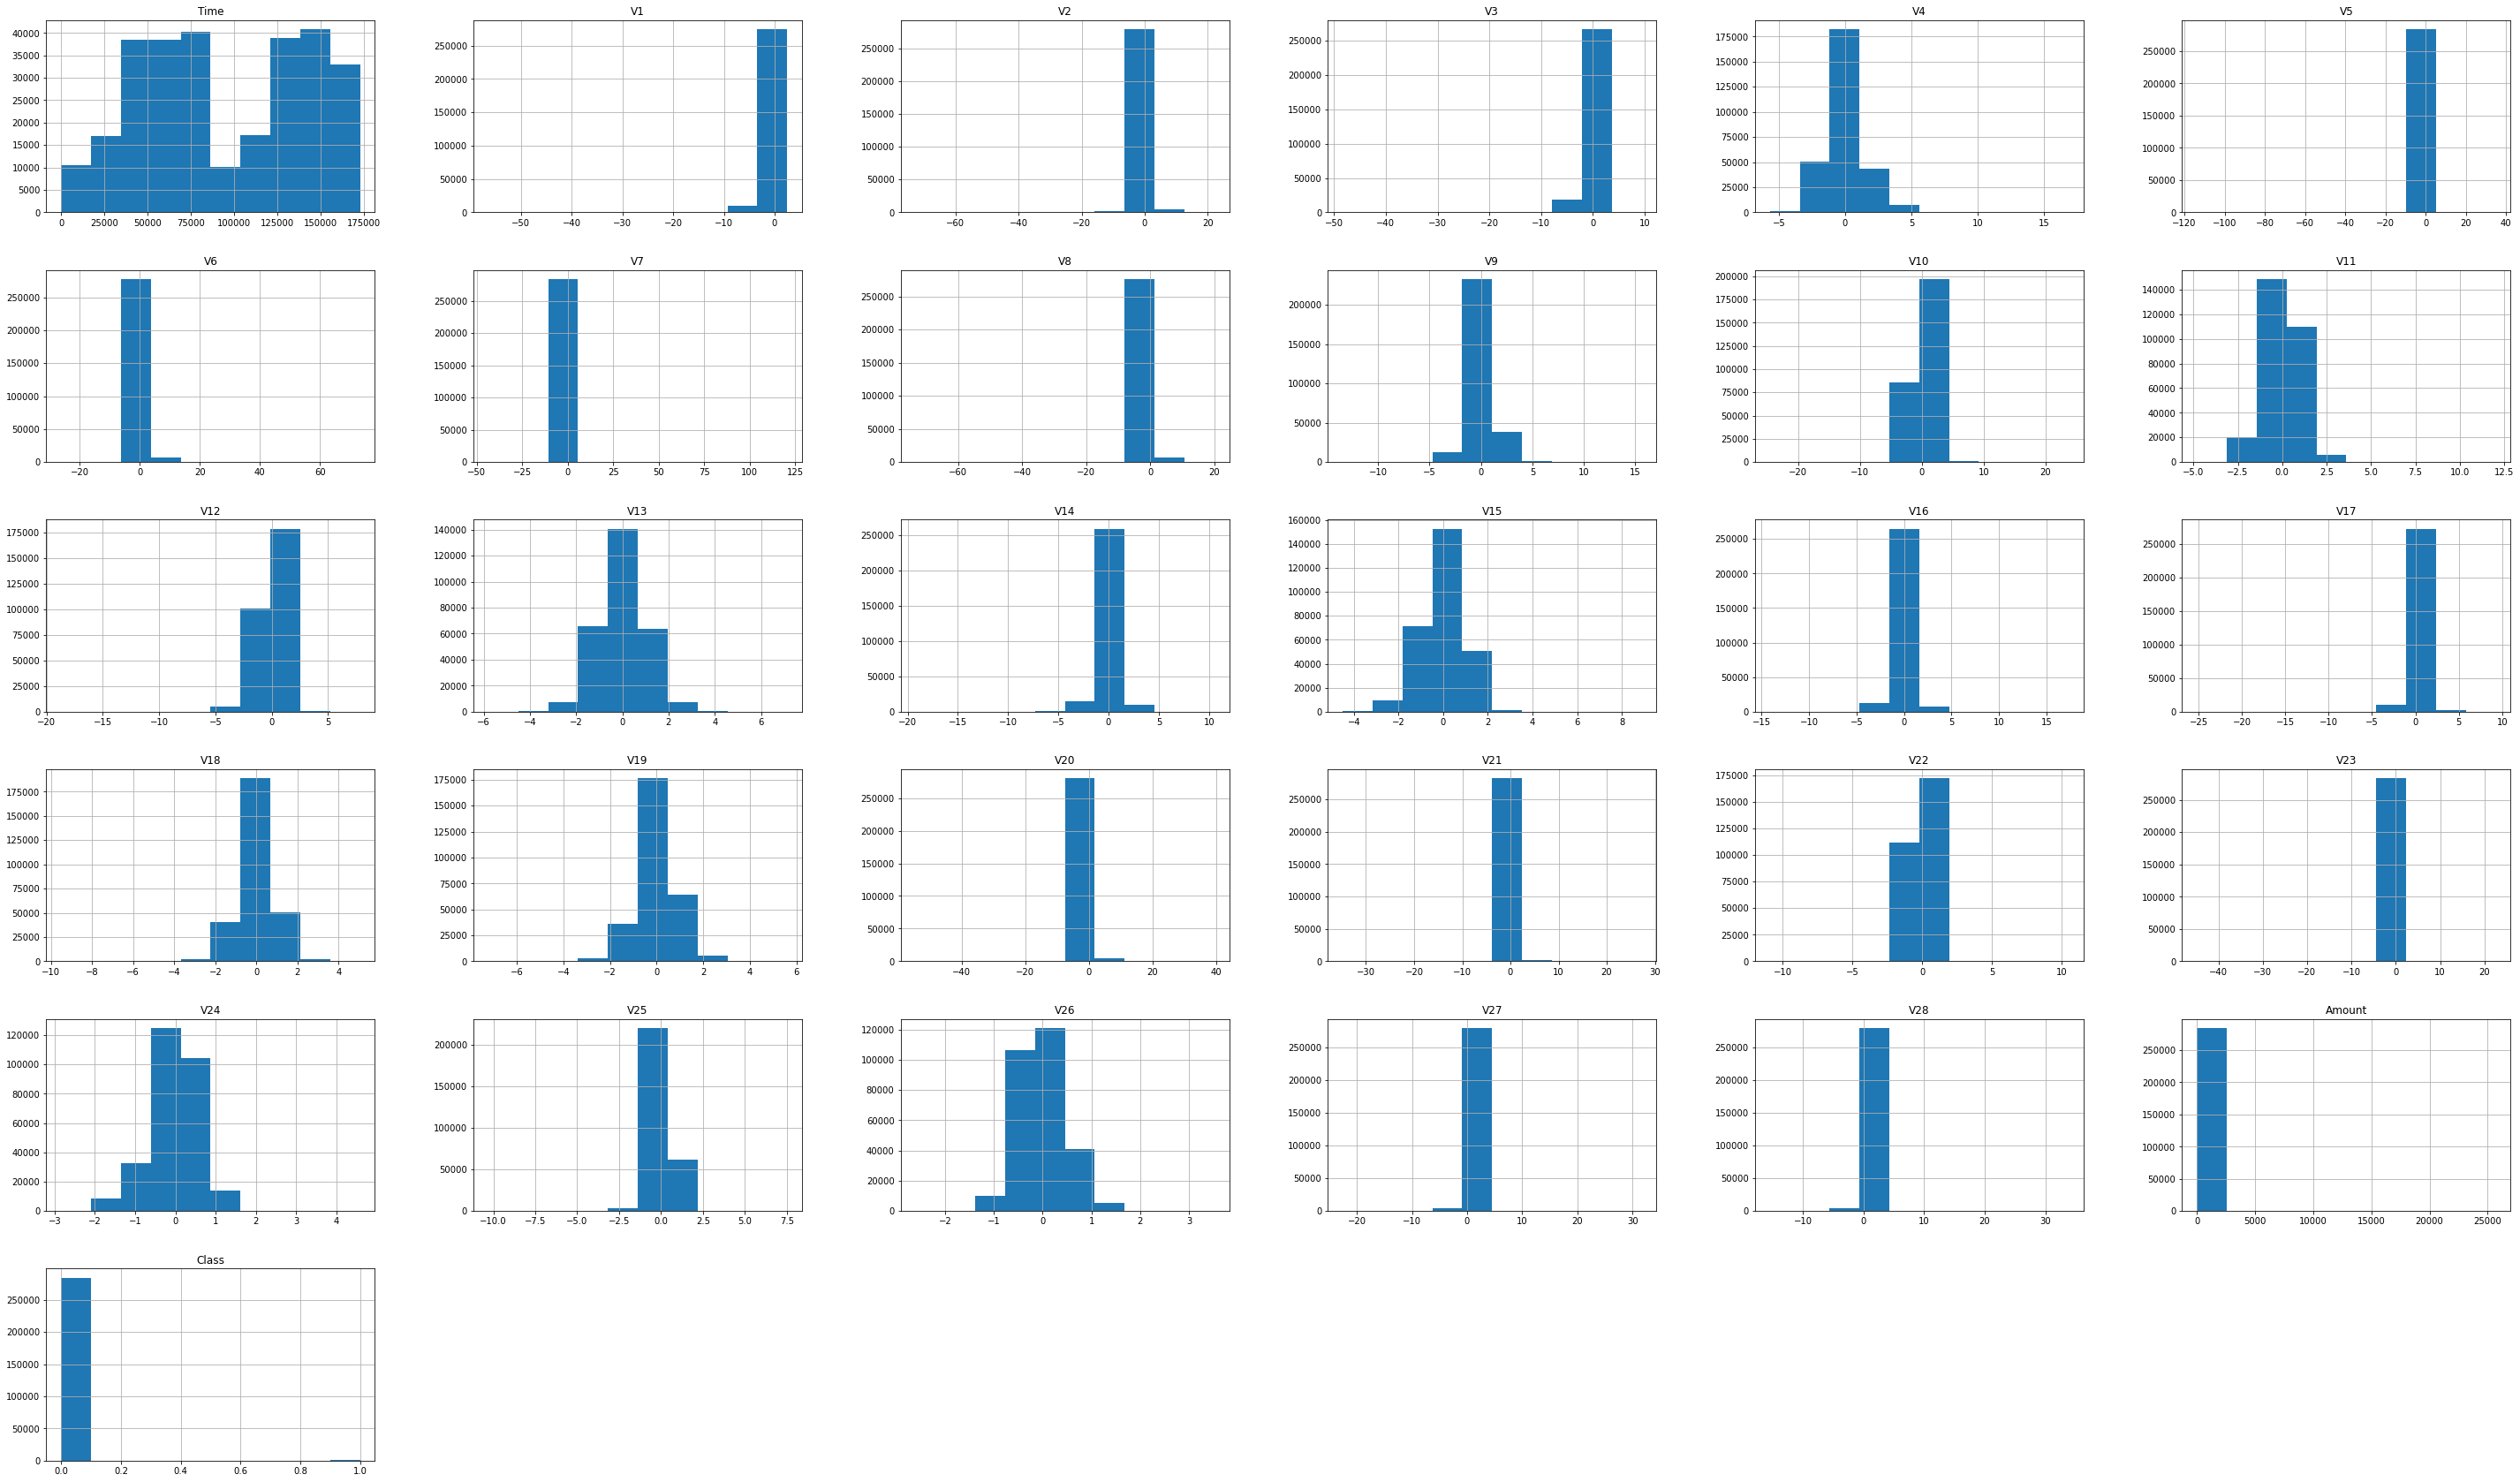

In [21]:
#plot histogram of each parameter 
data.hist(figsize = (50,30))
plt.show()


In [24]:
#number of fraud cases in a dataset
Fraud = data[data['Class'] == 1]
Normal = data[data['Class'] == 0]

In [25]:
print('Fraud cases:', format(len(Fraud)))
print('Normal cases:', format(len(Normal)))

Fraud cases: 492
Normal cases: 284315


In [26]:
Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [27]:
Normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

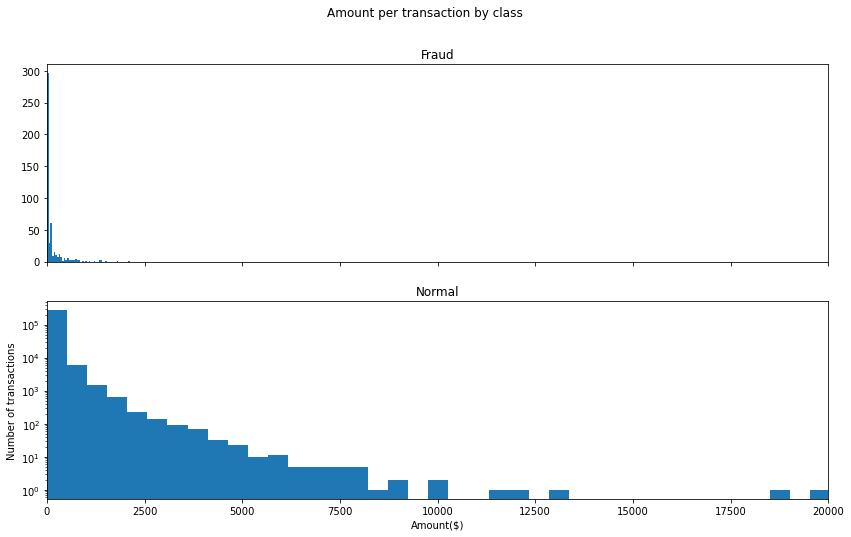

In [28]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(Fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(Normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount($)')
plt.ylabel('Number of transactions')
plt.xlim((0,20000))
plt.yscale('log')
plt.show();

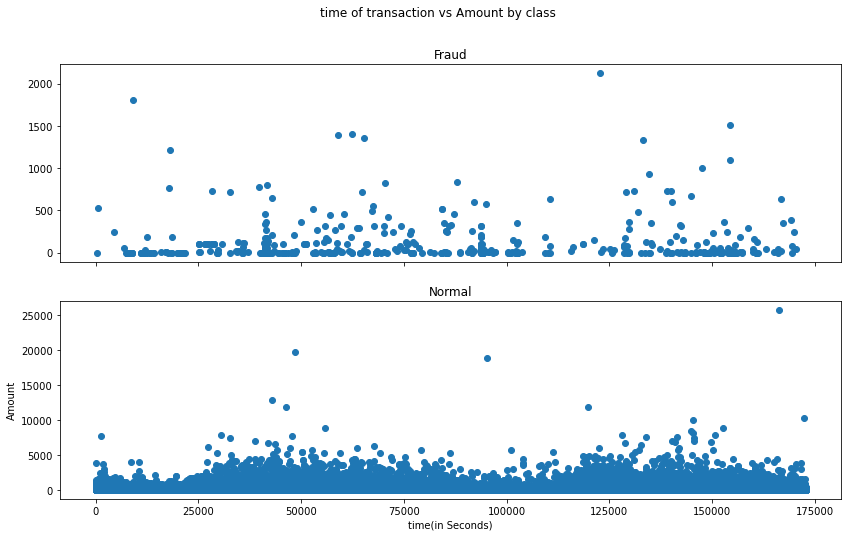

In [29]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('time of transaction vs Amount by class')

ax1.scatter(Fraud.Time, Fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(Normal.Time, Normal.Amount)
ax2.set_title('Normal')
plt.xlabel('time(in Seconds)')
plt.ylabel('Amount')
plt.show();

In [30]:
#take some sample of the data

data1= data.sample(frac = 0.1, random_state=1)
data1.shape


(28481, 31)

In [31]:
#determine the number of fraud and normal detections in the dataset

Fraud = data1[data1['Class']==1]

Normal = data1[data1['Class']==0]

outlier_fraction = len(Fraud)/float(len(Normal))

In [33]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Normal Cases : {}".format(len(Normal)))

0.0017234102419808666
Fraud Cases : 49
Normal Cases : 28432


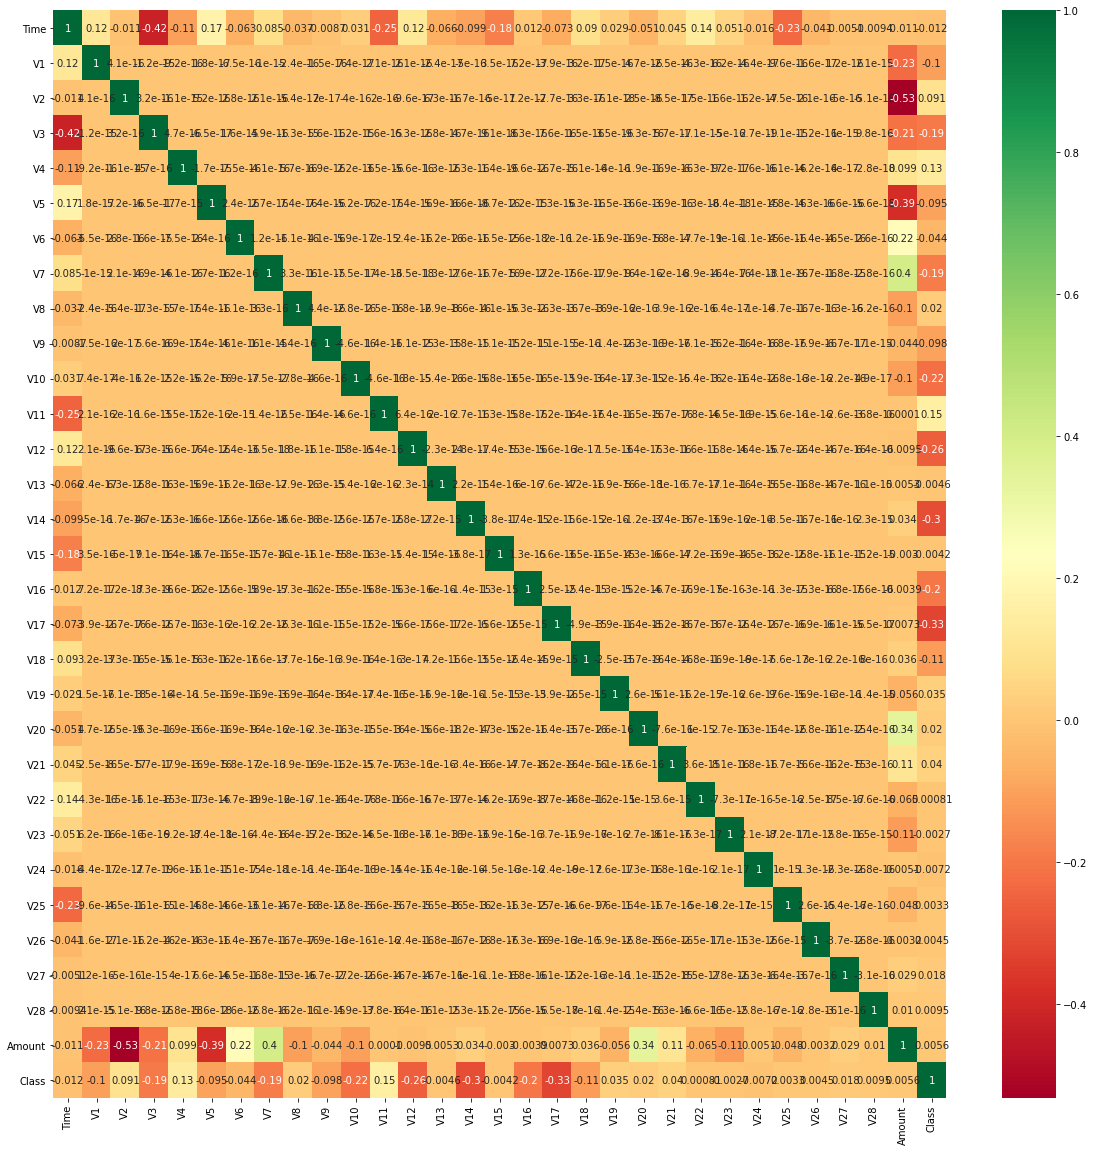

In [34]:
#correlation
import seaborn as sns
#get correlation of each features in dataset
corrmat = data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20.,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [35]:
#create independent and dependent features 
columns = data1.columns.tolist()
#filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ['Class']]
#store the variable we are predicting 
target = 'Class'
#define a random state
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[1]))
#print the shapes of X & Y
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


In [36]:
#define the outlier detection methods 

classifiers = {
   "Isolation Forest": IsolationForest(n_estimators=100,max_samples=len(X),contamination=outlier_fraction,random_state=state,verbose=0),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, algorithm='auto', leaf_size=30, metric='minkowski',p=2,contamination= outlier_fraction),
    "Support Vector Machine": OneClassSVM(kernel='rbf', degree=3, gamma=0.1, nu=0.5,max_iter=-1)
}

In [37]:
type(classifiers)

dict

In [ ]:
n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #fit the data and tag outliers 
    if clf_name=="Local Outlier Factor":
        y_pred= clf.fit_predict(X)
        scores_prediction= clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred= clf.predict(X)
    else:
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred= clf.predict(X)
     
    #reshapethe prediction values to 0 for valid transaction , 1 for Fraud trasaction
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors= (y_pred !=Y).sum()
    #run classification metrics
    print("{}:{}".format(clf_name, n_errors))
    print("Accuracy Score:")
    print(accuracy_score(Y,y_pred))
    print("Classification Report:")
    print(classification_report(Y,y_pred))

Isolation Forest:79
Accuracy Score:
0.9972262209894316
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.20      0.20      0.20        49

    accuracy                           1.00     28481
   macro avg       0.60      0.60      0.60     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor:97
Accuracy Score:
0.9965942207085425
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

